  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="center">
                <font size=25px>
                    <b> ABALONE AGE PREDICTION
                    </b>
                </font>
            </div>
        </td>
    </tr>


# **Description**:-

Predicting the age of abalone from physical measurements.
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.
Other measurements, which are easier to obtain, are used to predict age. Further information, such as weather patterns and location (hence food
availability) may be required to solve the problem.

# **Attribute Information**:
Given is the attribute name, attribute type, measurement unit, and a brief description.

The number of rings is the value to predict: either as a continuous value or as a classification problem.

# Name / Data Type / Measurement Unit / Description

1- Sex / nominal / -- / M, F, and I (infant)

2- Length / continuous / mm / Longest shell measurement

3- Diameter / continuous / mm / perpendicular to length

4- Height / continuous / mm / with meat in shell

5- Whole weight / continuous / grams / whole abalone

6- Shucked weight / continuous / grams / weight of meat

7- Viscera weight / continuous / grams / gut weight (after bleeding)

8- Shell weight / continuous / grams / after being dried

9- Rings / integer / -- / +1.5 gives the age in years

## IMPORT LIBRARIES

In [86]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

#models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
sns.set()

##LOAD THE DATASET

In [87]:
data = pd.read_csv('/content/abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


From problem statement and feature discription, let's first compute the target varible of the problem ' Age' and assign it to the dataset. Age = 1.5+Rings

In [88]:
data['Age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)

## EXPLORATORY DATA ANALYSIS


In [89]:
#Dimensions - dataset
print("No. of rows : ", data.shape[0])
print("No. of columns : ", data.shape[1])
print('This dataset has {} observations with {} features.'.format(data.shape[0], data.shape[1]))

No. of rows :  4177
No. of columns :  9
This dataset has 4177 observations with 9 features.


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [91]:
#Statistical summary of features
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [92]:
# data frame with categorical features
data.describe(include='object')

,Sex
count,4177
unique,3
top,M
freq,1528


In [93]:
#Columns - dataset
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [94]:
#Datatypes - given Dataset
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

##Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8936b93b50>,
      dtype=object)

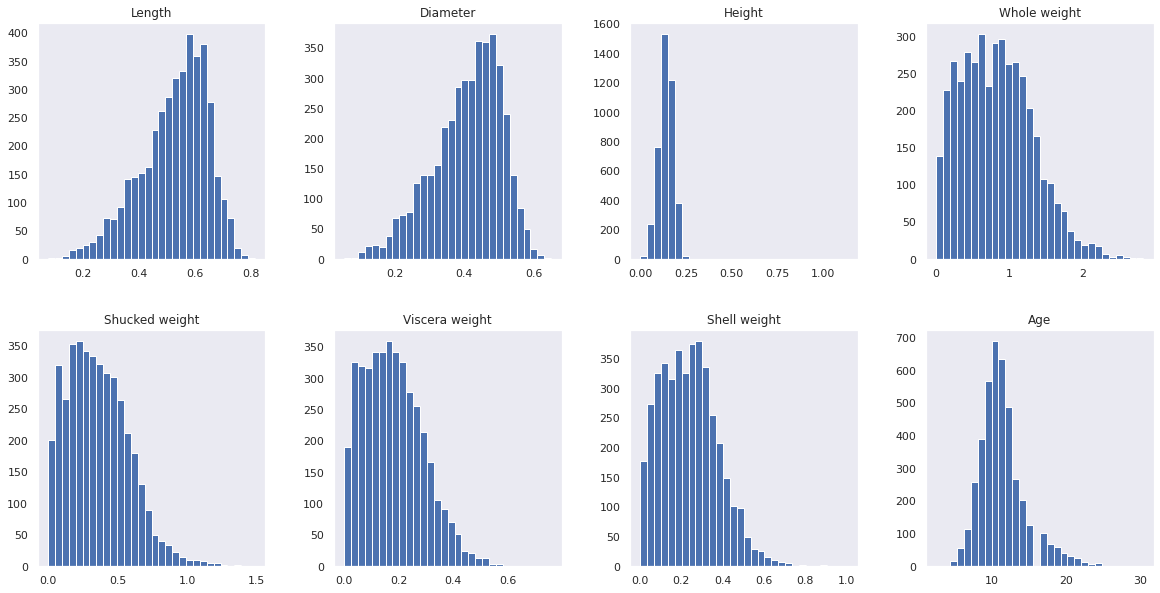

In [95]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [96]:
#Variable Separation
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

In [97]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [98]:
categorical_features

Index(['Sex'], dtype='object')

In [99]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


- Height has highest skewedness followed by age, Shucked weight

In [100]:
# Missing values
Total = data.isnull().sum().sort_values(ascending = False)          

Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Age,0,0.0


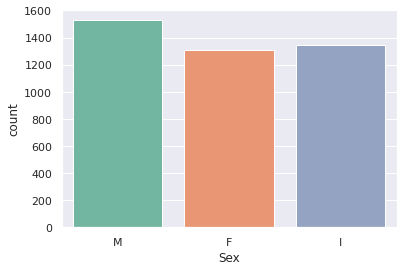

In [101]:
sns.countplot(x = 'Sex', data = data, palette="Set2")

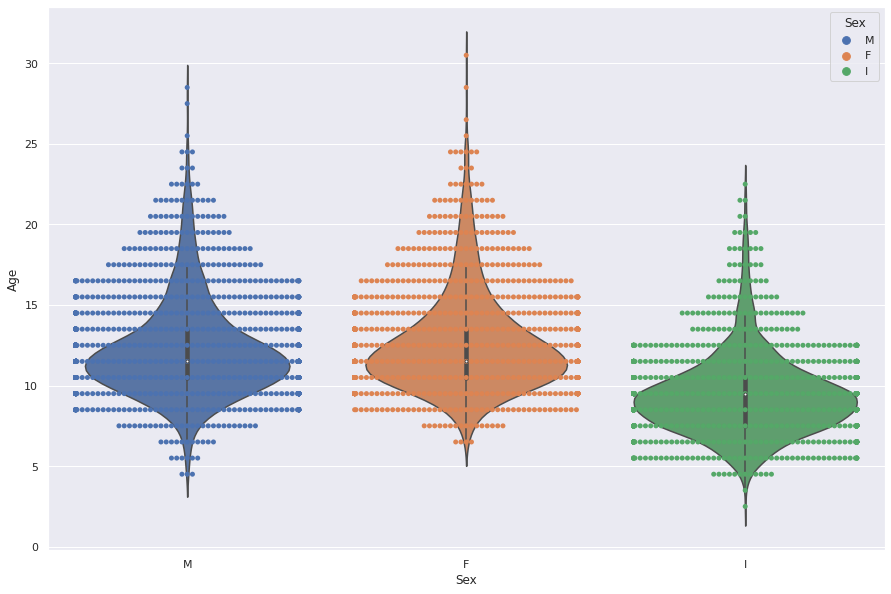

In [102]:
plt.figure(figsize = (15,10))
sns.swarmplot(x = 'Sex', y = 'Age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = data)

  - Male : age majority lies in between 7.5 years to 19 years
  - Female: age majority lies in between 8 years to 19 years
  - Immature: age majority lies in between 6 years to < 10 years

In [103]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age']].mean().sort_values('Age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


##Bivariate Analysis

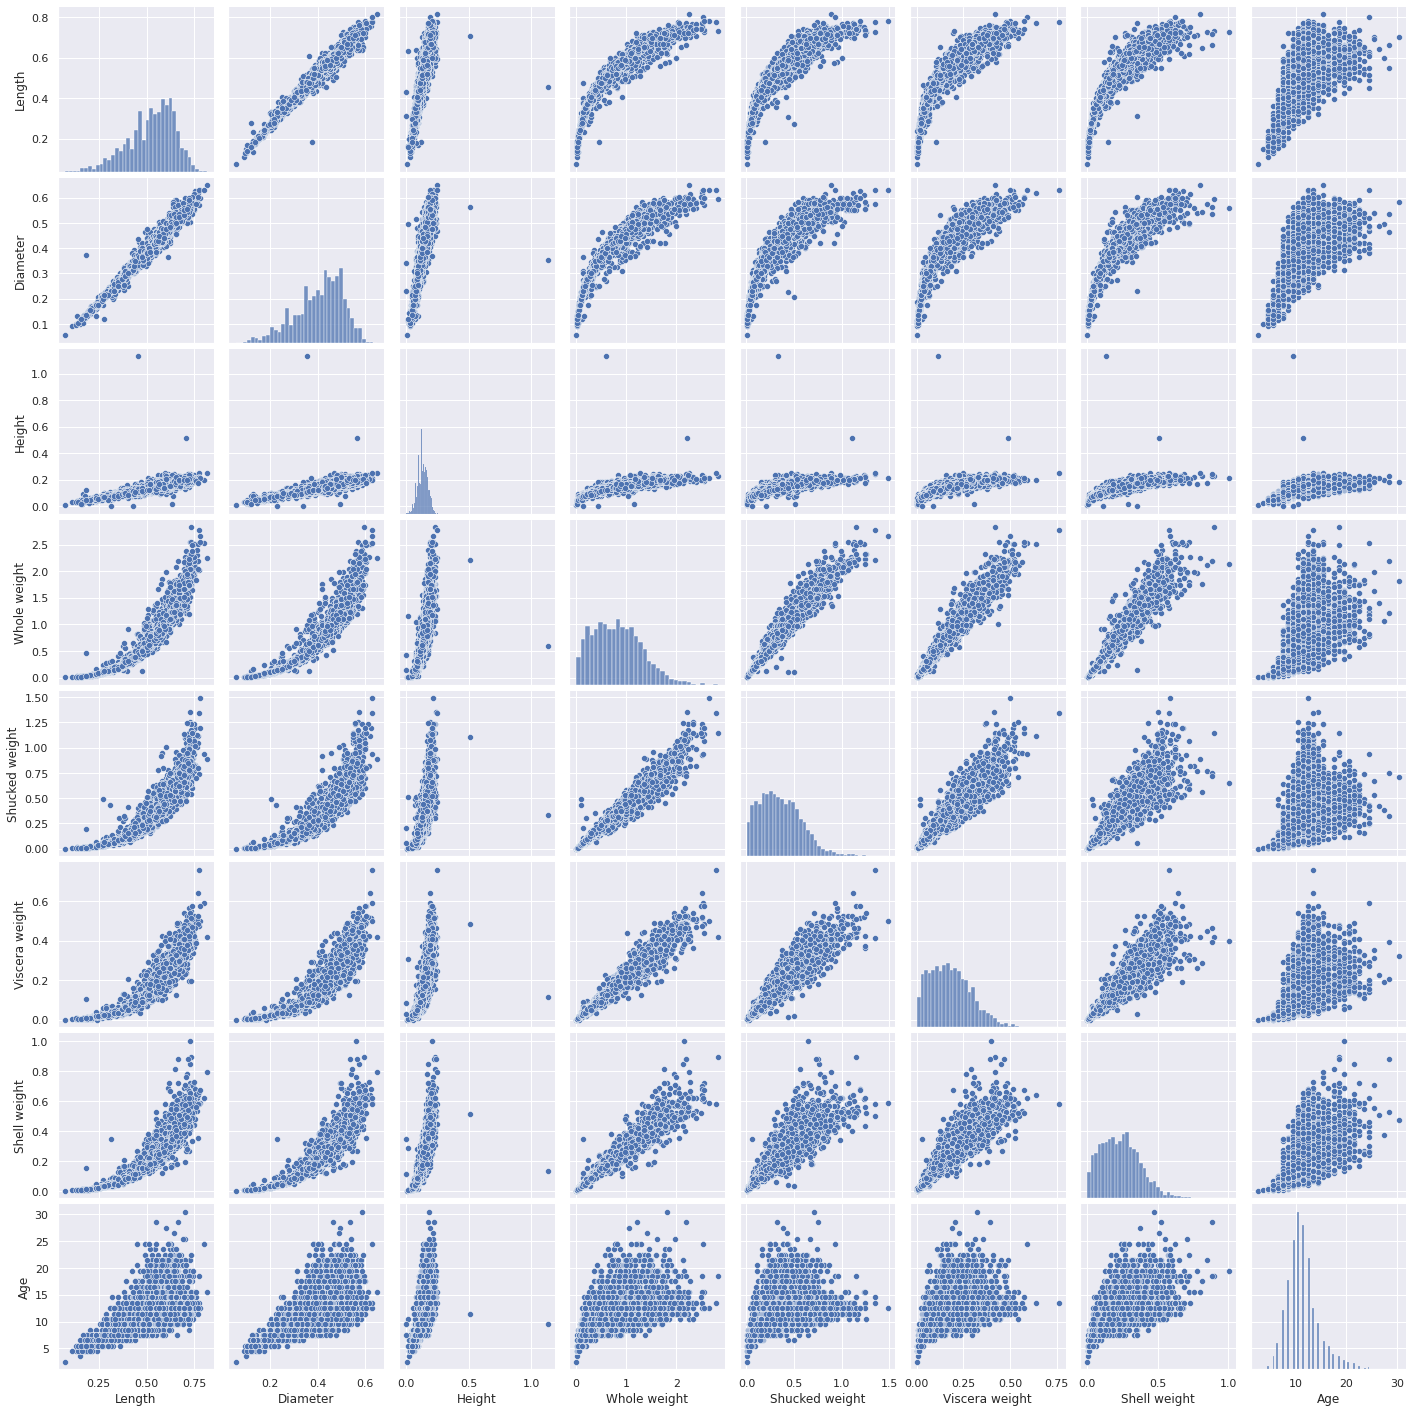

In [104]:
sns.pairplot(data[numerical_features])

- Key insights length is linearly correlated with diameter while, non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight

In [106]:
#Unique Values
data.nunique().to_frame("# of unique values")

,# of unique values
Sex,3
Length,134
Diameter,111
Height,51
Whole weight,2429
Shucked weight,1515
Viscera weight,880
Shell weight,926
Age,28


## TRAIN_TEST SPLIT

In [107]:
# train test split

train, test = train_test_split(data, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 3132
Test data points : 1045


In [108]:
#Variable separation
numerical_features = ["Length", 'Diameter', 'Height','Whole weight',
                      'Shucked weight', 'Viscera weight', 'Shell weight']

categorical_feature = "Sex"

features = numerical_features + [categorical_feature]

target = 'Age'

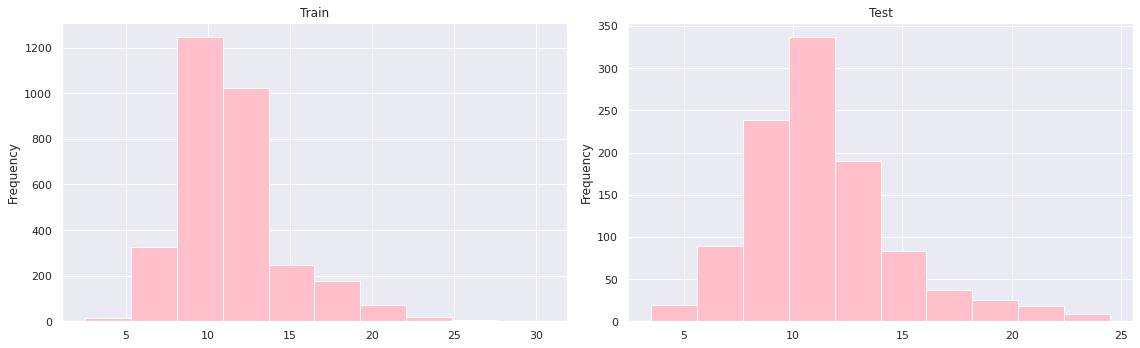

In [111]:
#Target_Distribution
fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

train[target].plot.hist(color='pink', ax=axes[0])
axes[0].set(title="Train")

test[target].plot.hist(color='pink', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

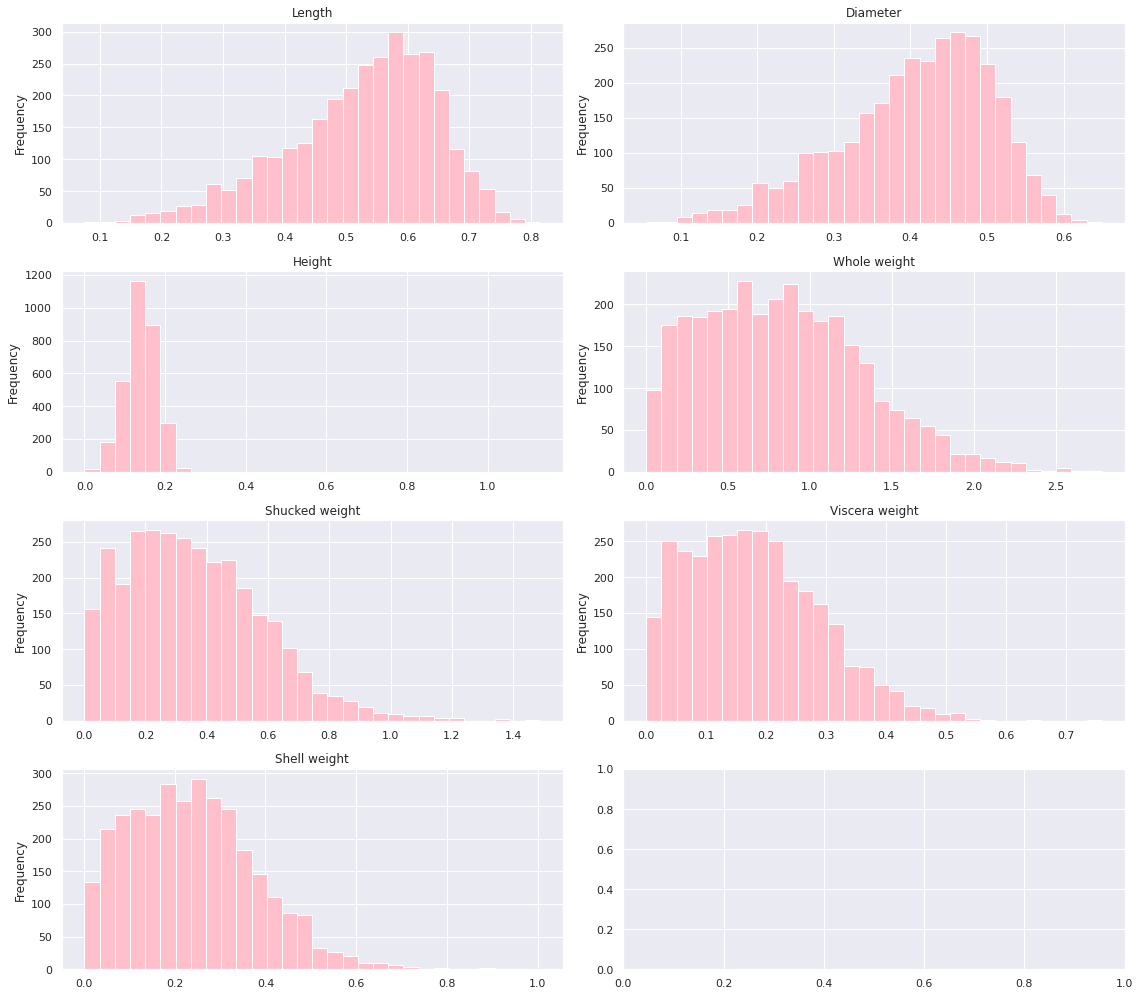

In [113]:
#Numerical_feature_Distribution
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'hist', ax=axes[i], title=c, color='pink', bins=30)
    
plt.tight_layout()
plt.show()

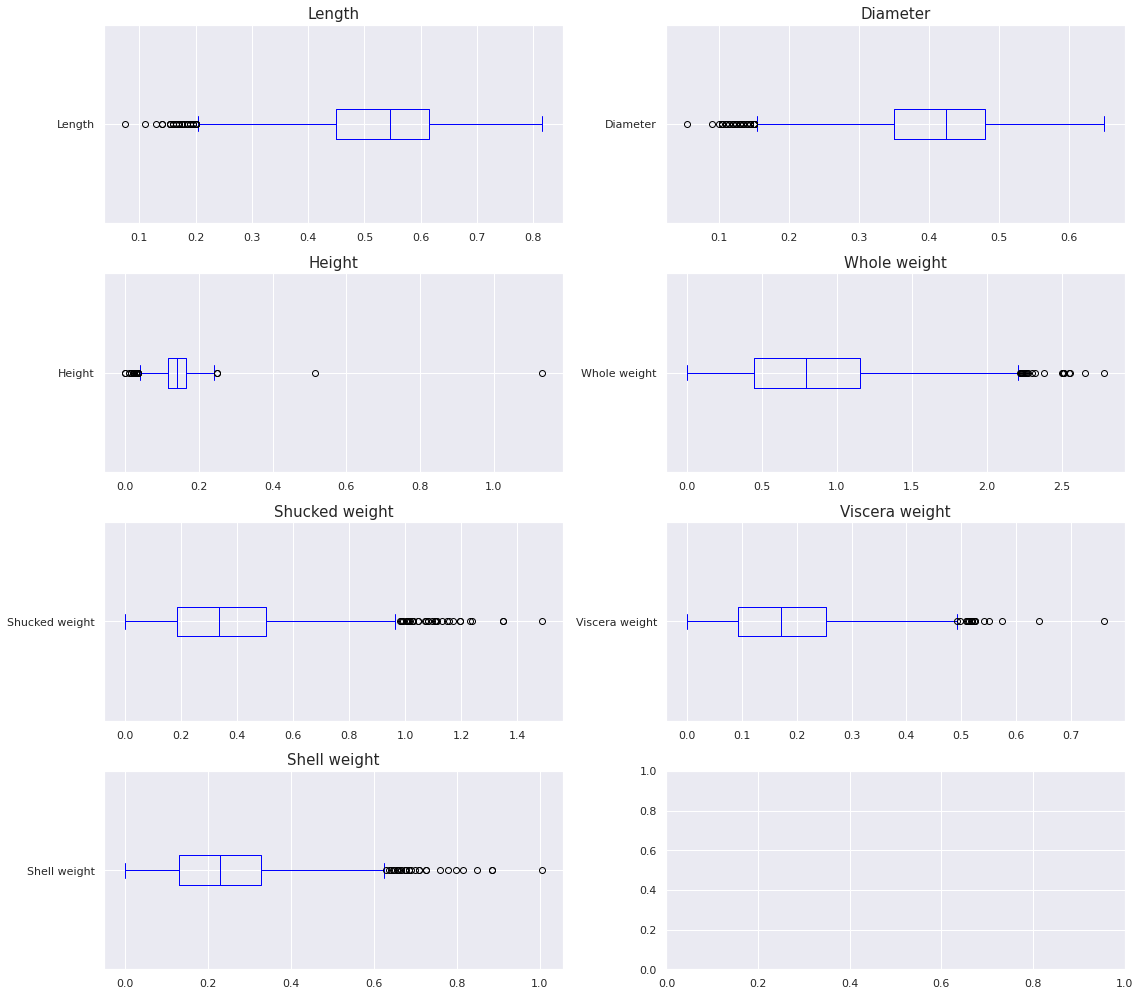

In [114]:
#Outliers_Handling
ig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

Observation :
Most of our features contain outliers.
'Height' feature as extreme outliers.

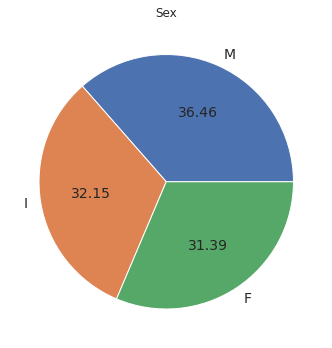

In [115]:
t = train[categorical_feature].value_counts(normalize=True)
t.plot(kind='pie',
       figsize=(5,5),
       title=categorical_feature,
       ylabel="",
       autopct="%.2f",
       fontsize=14)
plt.tight_layout()
plt.show()

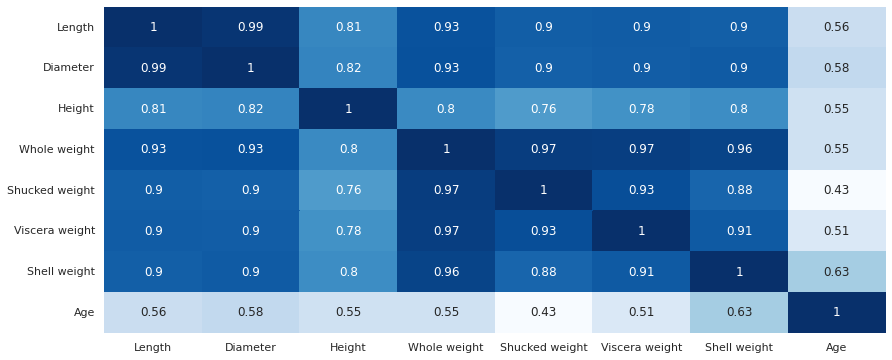

In [116]:
plt.figure(figsize=(14,6))
sns.heatmap(train.corr(method='pearson'),
            annot=True,
            cbar=False,
            cmap='Blues')
plt.show()

## PREPROCESSING , MODELLING ,  EVALUATION

  - Pre-processing 
  - Suitable model selection
  - Modeling
  - Hyperparameter Tuning
  - Evaluation

In [117]:
#lable encoding
train.Sex = train.Sex.replace({"M":1, "I":0, "F":-1})
test.Sex = test.Sex.replace({"M":1, "I":0, "F":-1})

In [118]:
#Removing Outliers
idx = train.loc[train.Height>0.4].index
train.drop(idx, inplace=True)

idx = train.loc[train['Viscera weight']>0.6].index
train.drop(idx, inplace=True)

idx = train.loc[train[target]>25].index
train.drop(idx, inplace=True)

In [119]:
#Feature_Separation
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
4014,0.625,0.480,0.175,1.0650,0.4865,0.2590,0.285,1
3252,0.480,0.380,0.130,0.6175,0.3000,0.1420,0.175,1
305,0.200,0.145,0.060,0.0370,0.0125,0.0095,0.011,0
1857,0.505,0.400,0.145,0.7045,0.3340,0.1425,0.207,0
439,0.500,0.415,0.165,0.6885,0.2490,0.1380,0.250,1


In [132]:
#Base Models
models = {'Linear_regression':LinearRegression(),
         
         'Lasso':Lasso(random_state=1),
         
         'Decision_Tree':DecisionTreeRegressor(random_state=1),
         
         'Random_Forest':RandomForestRegressor(random_state=1),
         
         }

In [133]:
#Helper Function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def eval_model(model, X_train, y_train, X_test, y_test):
    _ = model.fit(X_train, y_train)
    print("Train rmse : ", rmse(y_train, model.predict(X_train)))
    print("Test rmse : ", rmse(y_test, model.predict(X_test)))

In [134]:
for key, regressor in models.items():
    print(key)
    eval_model(regressor, X_train, y_train, X_test, y_test)
    print("\n------------------------------------------")

Linear_regression
Train rmse :  2.1601637766834694
Test rmse :  2.1993326495103673

------------------------------------------
Lasso
Train rmse :  3.1425445775484584
Test rmse :  3.2071190143034873

------------------------------------------
Decision_Tree
Train rmse :  0.0
Test rmse :  2.8672378052018894

------------------------------------------
Random_Forest
Train rmse :  0.7983734867135102
Test rmse :  2.1456051220373515

------------------------------------------


## Hyper_Parameter Tuning

In [135]:
# Linear regression
lr_params = {'fit_intercept':[True,False]}

# Lasso
lasso_params = {'alpha': [1e-4, 1e-3, 1e-2, 1, 10, 100]}

# Decision tree
dt_params =  {'max_depth': [4, 6, 8, 10, 12, 14, 16, 20],
            'min_samples_split': [5, 10, 20, 30, 40, 50],
            'max_features': [0.2, 0.4, 0.6, 0.8, 1],
            'max_leaf_nodes': [8, 16, 32, 64, 128,256]}

# Random Forest
rf_params = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 150, 200, 250]}


In [136]:
params = [lr_params, lasso_params, dt_params, rf_params]

# searching Hyperparameters
i=0
for name, model in models.items():
    print(name)
    regressor = RandomizedSearchCV(estimator = model,
                                   n_iter=10,
                                   param_distributions = params[i],
                                   cv = 3,
                                   scoring = 'neg_root_mean_squared_error')
    
    search = regressor.fit(X_train, y_train)
    
    print('Best params :',search.best_params_)
    print("RMSE :", -search.best_score_)
    i+=1
    print("\n------------------------------------------")

Linear_regression
Best params : {'fit_intercept': True}
RMSE : 2.1685158384088488

------------------------------------------
Lasso
Best params : {'alpha': 0.0001}
RMSE : 2.168463202118033

------------------------------------------
Decision_Tree
Best params : {'min_samples_split': 30, 'max_leaf_nodes': 64, 'max_features': 0.6, 'max_depth': 12}
RMSE : 2.342561926666574

------------------------------------------
Random_Forest
Best params : {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
RMSE : 2.1141479346849468

------------------------------------------


## Best Model

In [137]:
#Rendom_Forest Reggressor is performing Better
rf_params = {'n_estimators': 200, 
             'min_samples_split': 2,
             'min_samples_leaf': 4, 
             'max_features': 'sqrt', 
             'max_depth': None, 
             'bootstrap': True}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=200,
                      random_state=1)

## Evaluation

In [138]:
print("Train rmse : ", rmse(y_train, model.predict(X_train)))
print("Test rmse : ", rmse(y_test, model.predict(X_test)))

Train rmse :  1.5313840467501842
Test rmse :  2.146490954202156


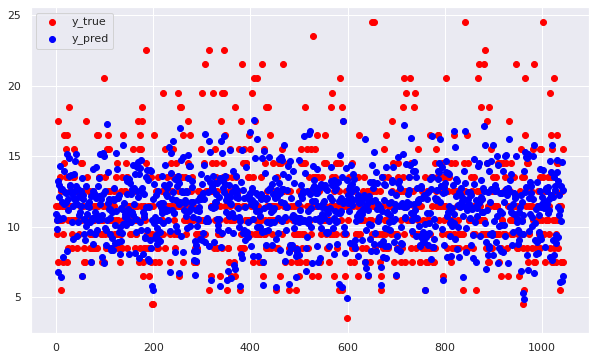

In [139]:
y_pred = model.predict(X_test)

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color='red', label='y_true')
plt.scatter(range(y_test.shape[0]), y_pred, color='blue', label='y_pred')
plt.legend()
plt.show()

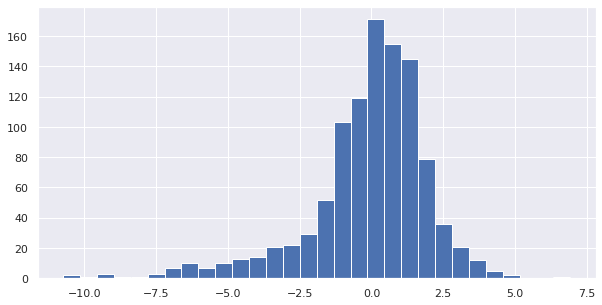

In [140]:
#Error_distribution
plt.figure(figsize=(10,5))
plt.hist(y_pred-y_test, bins=30)
plt.show()

In [146]:
#Save the model
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [147]:
#Prediction
def predict_age(x):
    x = pd.DataFrame([x], columns=features)
    age = model.predict(x)
    return round(age[0],2)

In [149]:
with open("model.pkl", 'rb') as f:
    model = pickle.load(f)
    
# Random sample from test set
ex = [0.295 , 0.225 , 0.08  , 0.124 , 0.0485, 0.032 , 0.04 ,0.]

print("Estimated age : ",predict_age(ex))

Estimated age :  8.86
